### NOTEBOOK CONTENTS:

1. Analysis around the driving factors for movie communities

### SUMMARY OF RESULTS:

1. Plot Keywords' wordclouds look quite similar across all the movie communities
2. Genre distribution shows some differences among various communities however, not too much.
3. Release year seems to vary quite strongly for various communites. Communities having movies from around 1980-early 2000s seemed to have much higher ratings than more of the recent ones.
4. Topics (from topic modelling) distribution seems to also vary quite strongly among communities. Documentries and historical movies seemed to have higher ratings as compared to teenage dramas

##### Imports and loads

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
m_com = pd.read_csv("/content/drive/MyDrive/movies_big/emb/m_communities.csv")
m_meta = pd.read_csv("/content/drive/MyDrive/movies_big/movies_metadata.csv")
link_df = pd.read_csv('/content/drive/MyDrive/movies_big/emb/links.csv')
m_com.shape, m_meta.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


((13563, 5), (45466, 24))

In [ ]:
m_meta.drop_duplicates(subset=['id'], inplace=True)
m_meta['genres'] = m_meta['genres'].apply(lambda x: eval(x))
m_meta.dropna(subset=['title'], inplace=True)
m_meta['production_companies'] = m_meta['production_companies'].apply(lambda x: eval(x))
m_meta['id'] = m_meta['id'].astype(int)
m_meta.dropna(subset=['imdb_id'], inplace=True)
m_meta['imdbId']=m_meta['imdb_id'].apply(lambda x: int(x.replace("tt", "")))

In [ ]:
m_meta['genre_list'] = m_meta['genres'].apply(lambda x:  [g['name'] for g in x])

In [ ]:
m_meta.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,imdbId,genre_list
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,114709,"[Animation, Comedy, Family]"


In [ ]:
kwds_df = pd.read_csv("/content/drive/MyDrive/movies_big/emb/keywords.csv")

In [ ]:
m_com.head(1)

,community,id,average_ml_rating,n_ratings,graph_idx
0,5,1,3.888157,66008,0


In [ ]:
m_com = m_com.merge(link_df, left_on='id', right_on='movieId').merge(m_meta[['id', 'imdbId', 'genre_list']], left_on='imdbId', right_on='imdbId')
m_com = m_com.merge(m_meta[['title', 'imdbId']], left_on='imdbId', right_on='imdbId')
m_com = m_com.merge(m_meta[~m_meta['release_date'].isnull()][['imdbId','release_date']])
m_com['release_date']=m_com['release_date'].apply(lambda x: int(x.split("-")[0]))

m_meta = m_meta.merge(kwds_df)
m_com = m_com.merge(m_meta[['keywords', 'imdbId']], left_on='imdbId', right_on='imdbId')

In [ ]:
m_com['keywords']=m_com['keywords'].apply(lambda x: eval(x))
m_com['keywords'] = m_com['keywords'].apply(lambda x: [k['name'] for k in x])

In [ ]:
m_com.head(1)

,community,id_x,average_ml_rating,n_ratings,graph_idx,movieId,imdbId,tmdbId,id_y,genre_list,title,release_date,keywords
0,5,1,3.888157,66008,0,1,114709,862.0,862,"[Animation, Comedy, Family]",Toy Story,1995,"[jealousy, toy, boy, friendship, friends, riva..."


In [ ]:
group = m_com.groupby('community')

In [ ]:
from itertools import chain
from collections import Counter

In [ ]:
def plot_com_genres(m_com):
    group = m_com.groupby('community')
    coms = []
    genres = []
    for i in group:
        tot_genres = list(chain.from_iterable(i[1]['genre_list'].values))
        if len(tot_genres)>20:
            coms.append(i[0])
            genres.append(Counter(tot_genres))

    for c,g in zip(coms, genres):
        print("Community: ", c)
        temp = g.most_common(10)
        plt.bar([t[0] for t in temp], [t[1] for t in temp])
        plt.xticks(rotation=45)
        plt.show()

def plot_com_date(m_com):
    group = m_com.groupby('community')
    coms = []
    years = []
    for i in group:
        years_list = list(i[1]['release_date'].values)
        if len(years_list)>20:
            coms.append(i[0])
            years.append(years_list)

    for c,y in zip(coms, years):
        print("Community: ", c)
        print(np.mean(y), np.median(y))
        sns.boxplot(y)
        plt.show()

def plot_com_kwds(m_com):
    group = m_com.groupby('community')
    coms = []
    kwds = []
    for i in group:
        kwd_list = list(chain.from_iterable(i[1]['keywords'].values))
        if len(np.unique(kwd_list))>20:
            coms.append(i[0])
            kwds.append(kwd_list)

    for c,k in zip(coms, kwds):
        print("Community: ", c)
        wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white',
                    min_font_size = 10).generate_from_frequencies(Counter(k)) 
  
        # plot the WordCloud image                        
        plt.figure(figsize = (8, 8), facecolor = None) 
        plt.imshow(wordcloud) 
        plt.axis("off") 
        plt.tight_layout(pad = 0) 
        
        plt.show() 

##### Contribution of genre across movie communities

Community:  3


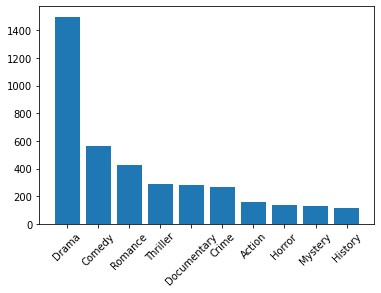

Community:  4


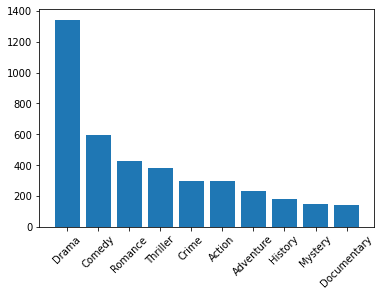

Community:  5


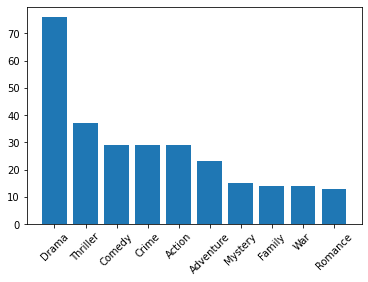

Community:  6


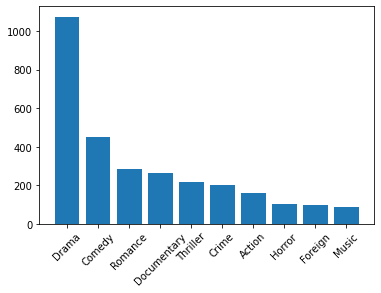

Community:  7


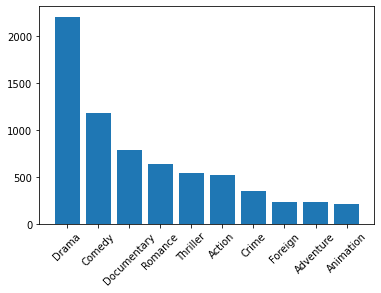

Community:  12


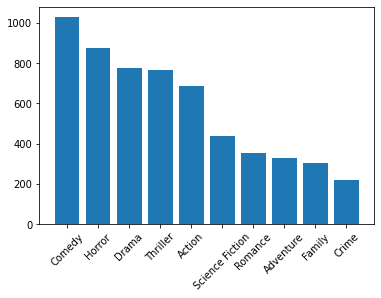

In [ ]:
plot_com_genres(m_com)

##### Contribution of plot keywords across movie communities

Community:  3


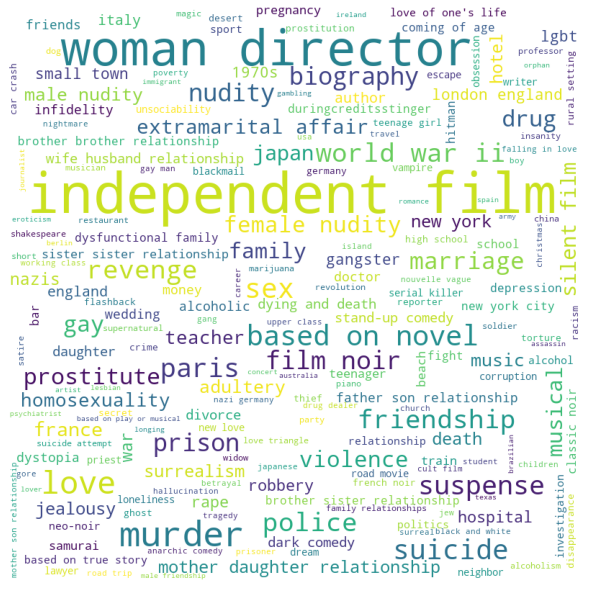

Community:  4


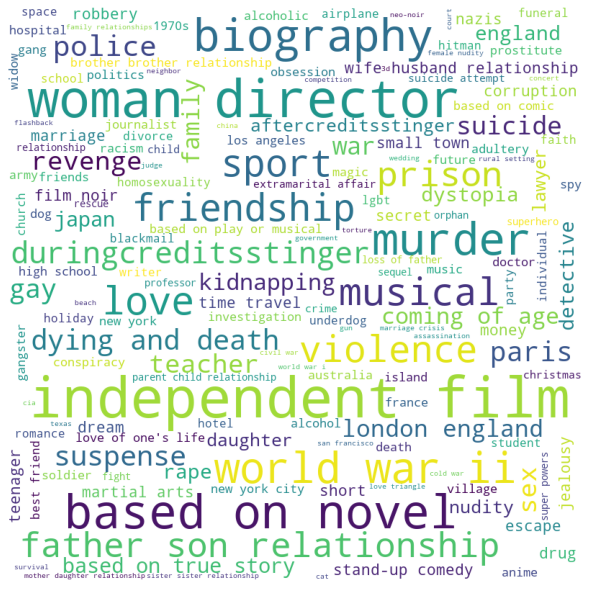

Community:  5


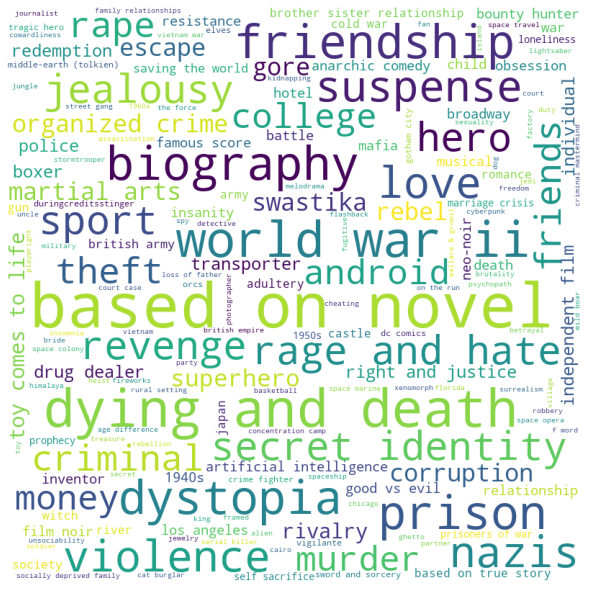

Community:  6


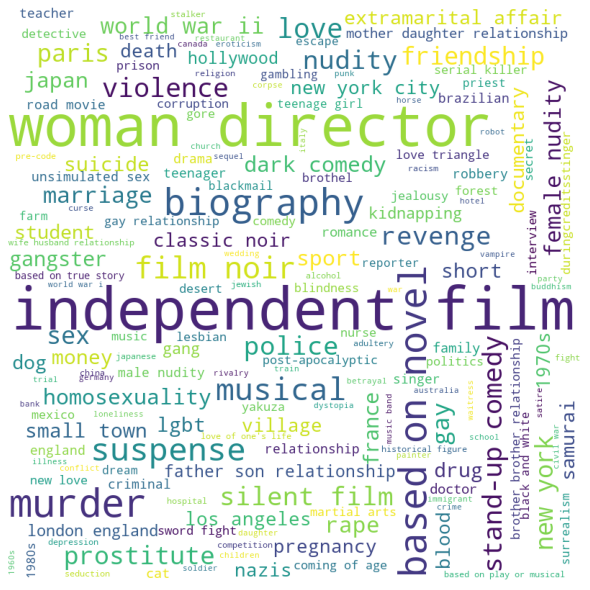

Community:  7


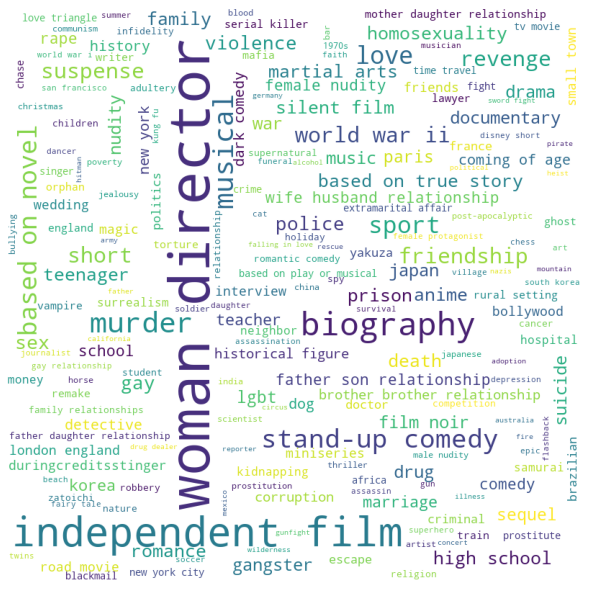

Community:  8


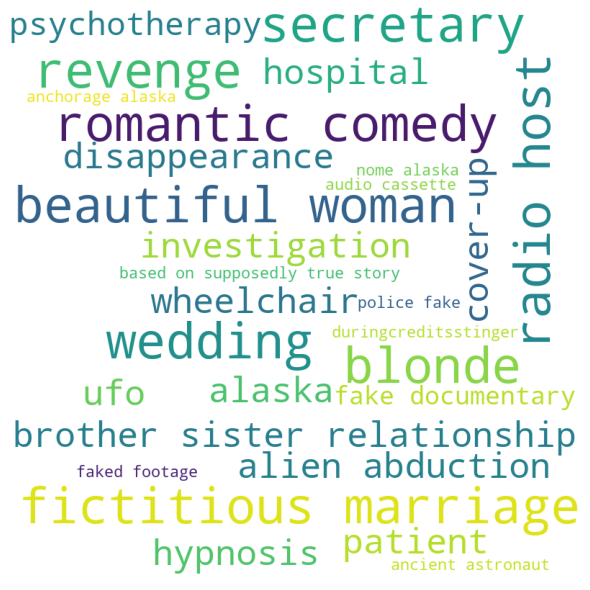

Community:  9


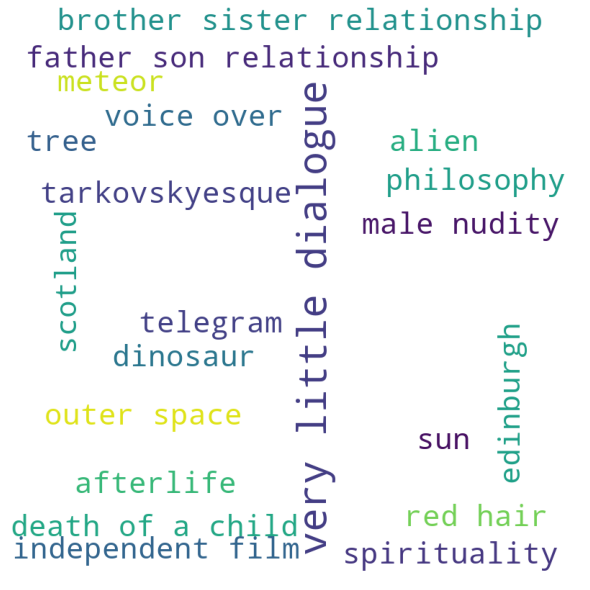

Community:  10


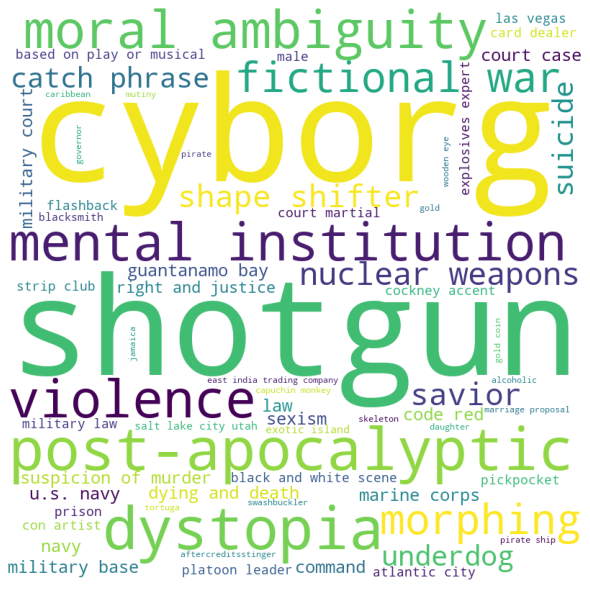

Community:  11


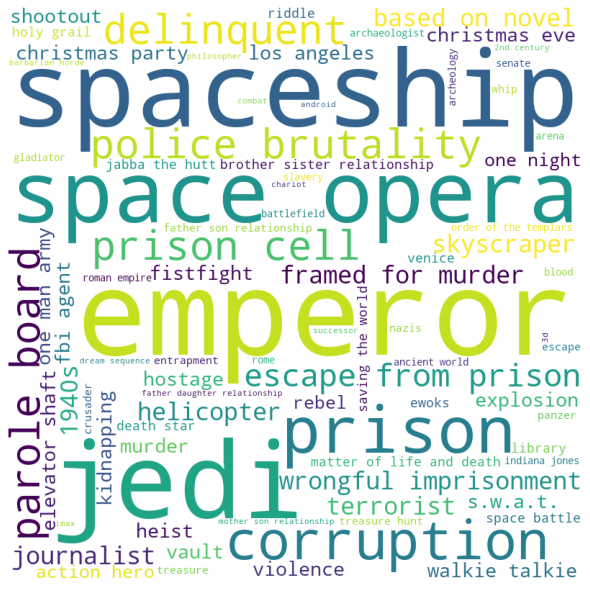

Community:  12


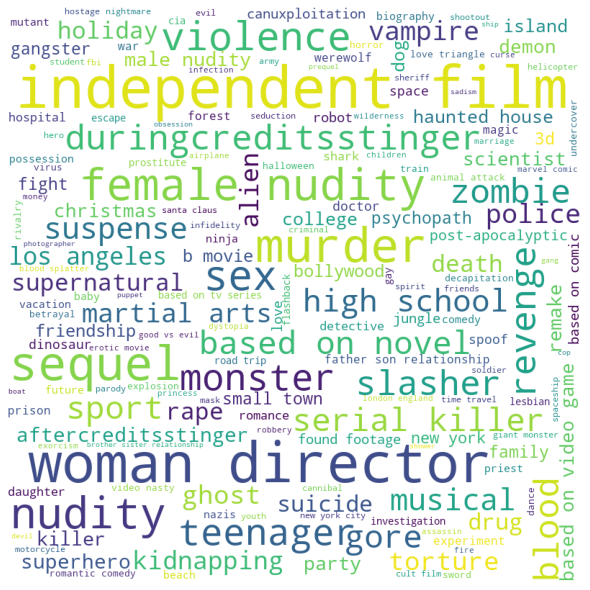

In [ ]:
plot_com_kwds(m_com)

##### Contribution of release year across movie communities

Community:  3
1985.438572090867 1994.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


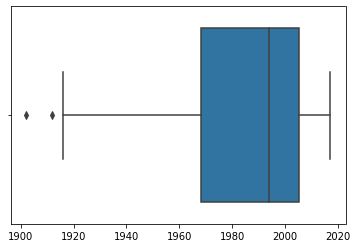

Community:  4
1992.4944578313252 2001.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


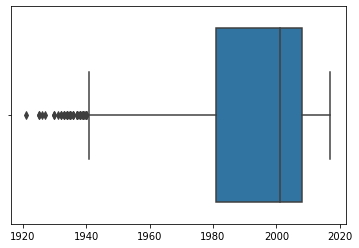

Community:  5
1984.0787401574803 1987.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


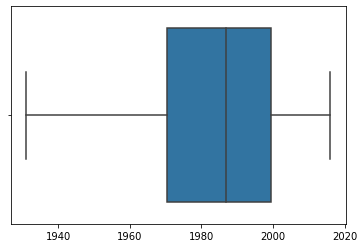

Community:  6
1986.8029445073612 1996.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


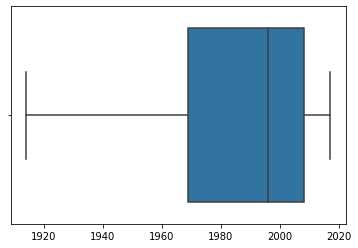

Community:  7
1994.283457458813 2006.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


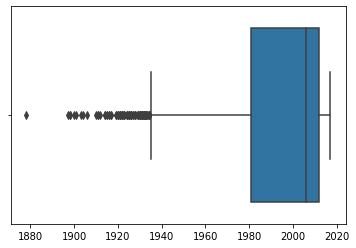

Community:  12
1998.4899193548388 2004.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


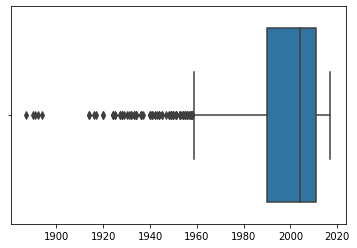

In [ ]:
plot_com_date(m_com)

In [ ]:
from wordcloud import WordCloud

##### Contribution of TOPICS (from topic modeling (NLP)) across movie communities

In [1]:
!pip install contextualized-topic-models

     |████████████████████████████████| 81kB 5.2MB/s 
     |████████████████████████████████| 71kB 10.3MB/s 
     |████████████████████████████████| 368kB 36.2MB/s 
     |████████████████████████████████| 14.5MB 240kB/s 
     |████████████████████████████████| 24.2MB 137kB/s 
     |████████████████████████████████| 13.1MB 246kB/s 
     |████████████████████████████████| 2.0MB 52.4MB/s 
     |████████████████████████████████| 1.2MB 45.2MB/s 
     |████████████████████████████████| 3.2MB 49.3MB/s 
     |████████████████████████████████| 890kB 48.7MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.4.1-cp37-none-any.whl size=103051 sha256=c4a720c73179679e268999357369c19c300150293e9d7b6edf6f0f6d3c4ba0d7
  Stored in directory: /root/.cache/pip/wheels/4d/61/1e/d8a2fc8fcfc0f86af8477bcdbca4a8832dd9230e2051c82cb0
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=4cd97fa3c71171df01f2e7ff04471d641033a2e891941784e33bd9a95f

In [1]:
import joblib
m_ids = joblib.load("/content/drive/MyDrive/movies_big/topic/m_ids.pkl")
topic_vectors = joblib.load("/content/drive/MyDrive/movies_big/topic/topic_vectors.pkl")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
m_com = pd.read_csv("/content/drive/MyDrive/movies_big/emb/m_communities.csv")
m_meta = pd.read_csv("/content/drive/MyDrive/movies_big/movies_metadata.csv")
link_df = pd.read_csv('/content/drive/MyDrive/movies_big/emb/links.csv')
m_com.shape, m_meta.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


((13563, 5), (45466, 24))

In [3]:
from contextualized_topic_models.models.ctm import CombinedTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation

In [4]:
ctm = joblib.load("/content/drive/MyDrive/movies_big/topic/ctm.pkl")

In [ ]:
# m_meta.dropna(subset=['overview'], inplace=True)
# m_meta.drop_duplicates(subset=['overview'], inplace=True)

In [ ]:
# qt = TopicModelDataPreparation("bert-base-nli-mean-tokens")
# testing_dataset = qt.create_test_set(m_meta['overview'].values)

In [5]:
m_meta.shape

(45466, 24)

In [6]:
# topic_distributions = ctm.get_doc_topic_distribution(testing_dataset, n_samples=20)
# topic_distributions.shape

In [7]:
m_com.head(1)

,community,id,average_ml_rating,n_ratings,graph_idx
0,5,1,3.888157,66008,0


In [8]:
m_meta.drop_duplicates(subset=['id'], inplace=True)
m_meta['genres'] = m_meta['genres'].apply(lambda x: eval(x))
m_meta.dropna(subset=['title'], inplace=True)
m_meta['production_companies'] = m_meta['production_companies'].apply(lambda x: eval(x))
m_meta['id'] = m_meta['id'].astype(int)
m_meta.dropna(subset=['imdb_id'], inplace=True)
m_meta['imdbId']=m_meta['imdb_id'].apply(lambda x: int(x.replace("tt", "")))

In [9]:
m_meta['genre_list'] = m_meta['genres'].apply(lambda x:  [g['name'] for g in x])

In [10]:
kwds_df = pd.read_csv("/content/drive/MyDrive/movies_big/emb/keywords.csv")

In [11]:
m_com = m_com.merge(link_df, left_on='id', right_on='movieId').merge(m_meta[['id', 'imdbId', 'genre_list']], left_on='imdbId', right_on='imdbId')
m_com = m_com.merge(m_meta[['title', 'imdbId']], left_on='imdbId', right_on='imdbId')
m_com = m_com.merge(m_meta[~m_meta['release_date'].isnull()][['imdbId','release_date']])
m_com['release_date']=m_com['release_date'].apply(lambda x: int(x.split("-")[0]))

m_meta = m_meta.merge(kwds_df)
m_com = m_com.merge(m_meta[['keywords', 'imdbId']], left_on='imdbId', right_on='imdbId')

In [12]:
m_com.head(1)

,community,id_x,average_ml_rating,n_ratings,graph_idx,movieId,imdbId,tmdbId,id_y,genre_list,title,release_date,keywords
0,5,1,3.888157,66008,0,1,114709,862.0,862,"[Animation, Comedy, Family]",Toy Story,1995,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."


In [13]:
def softmax(x):
    return np.exp(x - max(x)) / sum(np.exp(x - max(x)))

In [14]:
def plot_community_topic_distribution(ids, topic_vectors, m_com, c_id):
    community_item_ids = m_com[m_com['community']==c_id]['id_y'].values
    community_item_ids = set(community_item_ids)
    idxs = [idx for idx, _id in enumerate(ids) if _id in community_item_ids]
    com_vector = np.array(np.mean(topic_vectors[idxs], axis=0)).flatten()
    return com_vector
    # print("Community:",c_id)
    # plt.bar(range(len(com_vector)), com_vector)
    # plt.xticks(range(len(com_vector)))
    # plt.show()

In [15]:
len(m_ids), topic_vectors.shape

(44180, (44180, 20))

In [16]:
len(m_com[m_com['community']==7]['id_y'].values), len(set(m_com[m_com['community']==7]['id_y'].values).intersection(m_ids))

(4431, 4302)

In [17]:
# plot_community_topic_distribution(m_ids, topic_vectors, m_com, 12)

In [18]:
# plot_community_topic_distribution(m_ids, topic_vectors, m_com, 5)

In [19]:
vecs = []
for c in m_com['community'].unique():
    vecs.append(plot_community_topic_distribution(m_ids, topic_vectors, m_com, c))

In [20]:
community_topic_vecs = np.array(vecs)

In [21]:
mean_com_topic_vec = np.mean(community_topic_vecs, axis=0)

In [22]:
t_idxs = []
for t_vec in (community_topic_vecs-mean_com_topic_vec):
    t_idxs.append(np.argsort(t_vec)[::-1][:3])

In [23]:
cluster_ids = []
t_vecs = []
for c_id, vec in enumerate(community_topic_vecs):  
    if c_id in [3,4,5,6,7,12]:
        com_vector = np.zeros(vec.shape)
        com_vector[t_idxs[c_id]] = vec[t_idxs[c_id]]
        # data_viz.append({'cluster_id':int(c_id), 'topic_vector':list(com_vector)})
        cluster_ids.append(c_id)
        t_vecs.append(com_vector)

In [24]:
t_vecs = np.array(t_vecs)
t_vecs = t_vecs/np.sum(t_vecs, axis=1).reshape(-1,1)

Text(87.0, 0.5, 'Movie Community IDs')

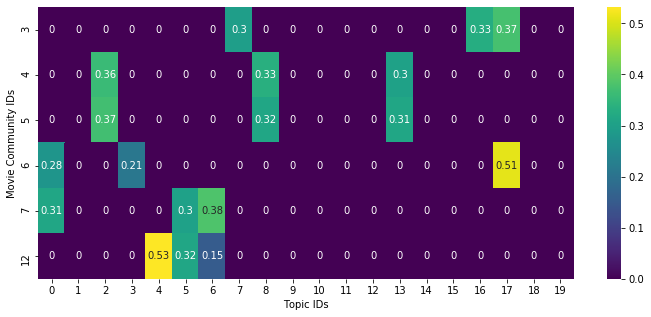

In [44]:
plt.figure(figsize=(12,5))
sns.heatmap(t_vecs, annot=True, cmap='viridis', yticklabels=cluster_ids)
plt.xlabel("Topic IDs")
plt.ylabel("Movie Community IDs")

Community: 3
Top 3 topics: [16  7 17]


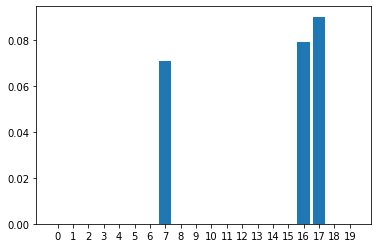

Community: 4
Top 3 topics: [ 2 13  8]


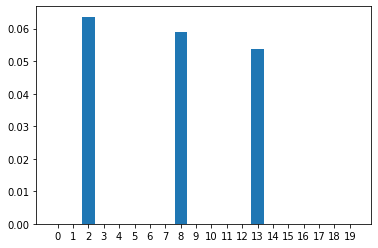

Community: 5
Top 3 topics: [ 2 13  8]


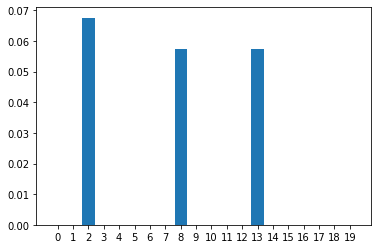

Community: 6
Top 3 topics: [17  0  3]


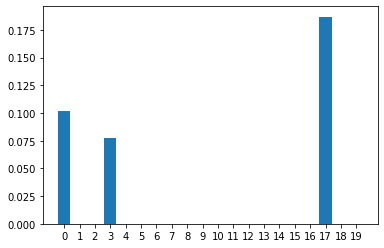

Community: 7
Top 3 topics: [6 0 5]


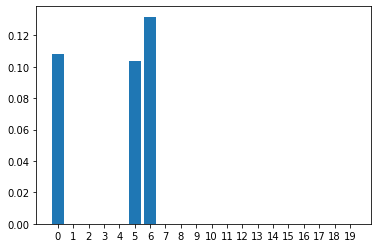

Community: 12
Top 3 topics: [4 5 6]


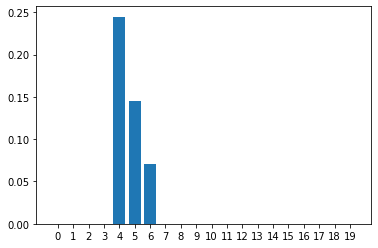

In [ ]:
for c_id, vec in enumerate(community_topic_vecs):  
    if c_id in [3,4,5,6,7,12]:
        print("Community:",c_id)
        print("Top 3 topics:", t_idxs[c_id])
        com_vector = np.zeros(vec.shape)
        com_vector[t_idxs[c_id]] = vec[t_idxs[c_id]]
        plt.bar(range(len(com_vector)), com_vector)
        plt.xticks(range(len(com_vector)))
        plt.show()

In [ ]:
community_topic_vecs[0][[2,3]]

array([0.04220048, 0.05544284])

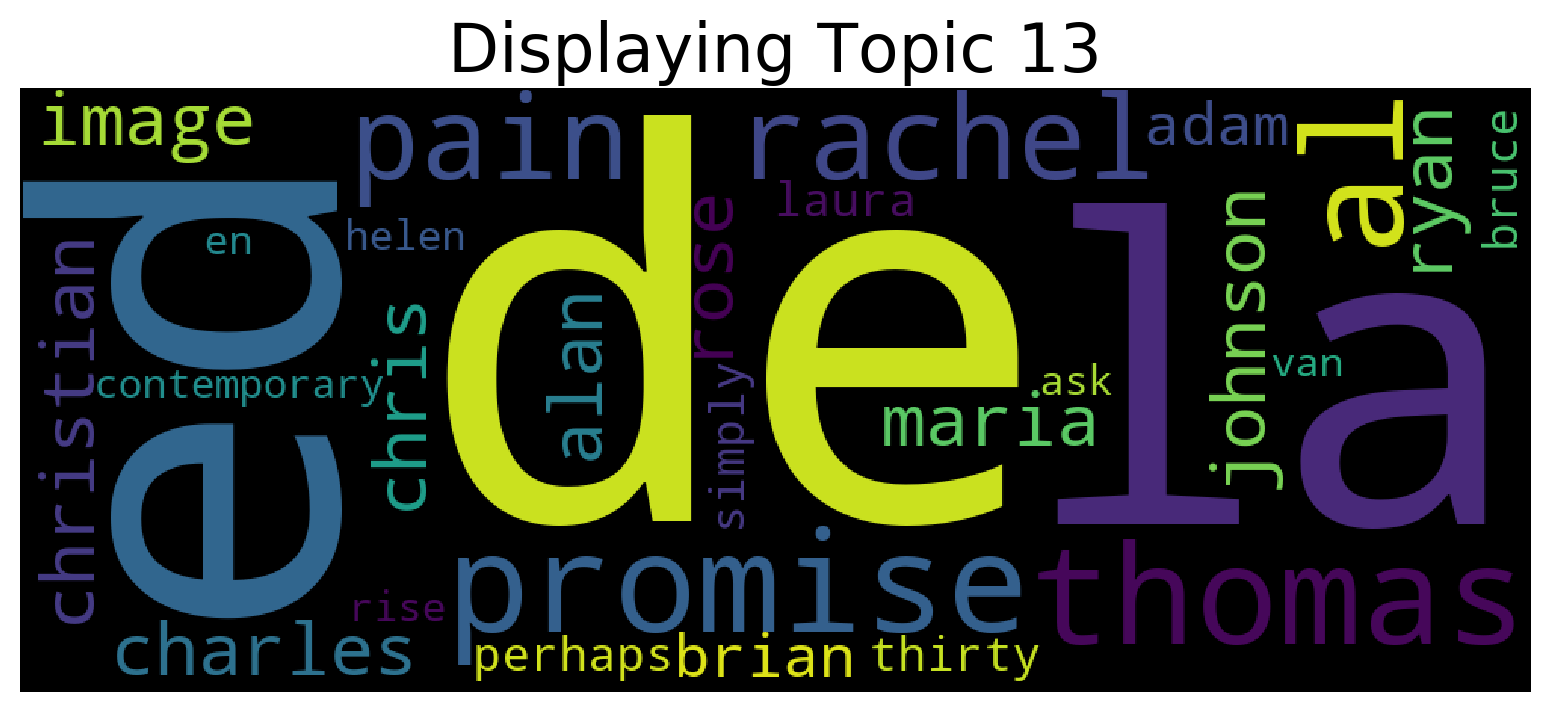

In [ ]:
ctm.get_wordcloud(13, 30)

In [ ]:
m_com['round_year'] = m_com['release_date'].apply(lambda x: (x//5)*5)

In [ ]:
m_com5 = m_com[m_com['community']==5]

In [ ]:
m_com5

,community,id_x,average_ml_rating,n_ratings,graph_idx,movieId,imdbId,tmdbId,id_y,genre_list,title,release_date,keywords,round_year
0,5,1,3.888157,66008,0,1,114709,862.0,862,"[Animation, Comedy, Family]",Toy Story,1995,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",1995
1,5,36,3.931582,23751,5,36,112818,687.0,687,[Drama],Dead Man Walking,1995,"[{'id': 378, 'name': 'prison'}, {'id': 570, 'n...",1995
2,5,47,4.068128,52658,8,47,114369,807.0,807,"[Crime, Mystery, Thriller]",Se7en,1995,"[{'id': 476, 'name': 'self-fulfilling prophecy...",1995
3,5,50,4.300189,59271,10,50,114814,629.0,629,"[Drama, Crime, Thriller]",The Usual Suspects,1995,"[{'id': 3703, 'name': 'law'}, {'id': 5493, 'na...",1995
4,5,58,3.965011,13347,14,58,110877,11010.0,11010,"[Comedy, Drama, Romance]",The Postman,1994,"[{'id': 2041, 'name': 'island'}, {'id': 3344, ...",1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,5,106782,3.858644,11517,9676,106782,993846,106646.0,106646,"[Crime, Drama, Comedy]",The Wolf of Wall Street,2013,"[{'id': 417, 'name': 'corruption'}, {'id': 572...",2010
123,5,112552,4.120284,8455,10116,112552,2582802,244786.0,244786,[Drama],Whiplash,2014,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",2010
124,5,112556,3.932529,10649,10117,112556,2267998,210577.0,210577,"[Mystery, Thriller, Drama]",Gone Girl,2014,"[{'id': 818, 'name': 'based on novel'}, {'id':...",2010
125,5,122882,3.829349,10457,10714,122882,1392190,76341.0,76341,"[Action, Adventure, Science Fiction, Thriller]",Mad Max: Fury Road,2015,"[{'id': 2964, 'name': 'future'}, {'id': 3713, ...",2015
